<a href="https://colab.research.google.com/github/digvijay20559/ML_Project/blob/main/Copy_of_dsc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
df = pd.read_csv('/content/drive/MyDrive/dsc/athletes.csv')
df.shape

(423006, 27)

In [38]:


# df2 = pd.read_csv('/content/drive/MyDrive/dsc/sample_athletes.csv')
df2=df.copy()
df2.head()

df2.drop(columns=['athlete_id','name'],inplace=True)
df2.head()

,region,team,affiliate,gender,age,height,weight,fran,helen,grace,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
0,South West,Double Edge,Double Edge CrossFit,Male,24.0,70.0,166.0,NaN,NaN,NaN,...,NaN,400.0,305.0,NaN,NaN,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|I r...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
1,NaN,NaN,NaN,Male,42.0,70.0,190.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,I have a coach who determines my programming|I...,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 2x a week|,4+ years|
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Southern California,LAX CrossFit,LAX CrossFit,Male,40.0,67.0,NaN,211.0,645.0,300.0,...,200.0,375.0,325.0,25.0,I eat 1-3 full cheat meals per week|,I workout mostly at a CrossFit Affiliate|I hav...,I played youth or high school level sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|,4+ years|
4,NaN,NaN,NaN,Male,32.0,65.0,149.0,206.0,465.0,NaN,...,150.0,NaN,325.0,50.0,I eat quality foods but don't measure the amount|,I workout mostly at a CrossFit Affiliate|I inc...,I played college sports|,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I strictly s...,1-2 years|


In [39]:
pd.DataFrame([df2.isna().sum(), df2.isna().sum() * 100 / df2.shape[0]],
             index=['number of missings', '% missings']).T

,number of missings,% missings
region,171744.0,40.600843
team,267846.0,63.319669
affiliate,181090.0,42.810267
gender,91896.0,21.724515
age,91896.0,21.724515
height,263137.0,62.206446
weight,193116.0,45.653253
fran,367580.0,86.897113
helen,392727.0,92.841946
grace,382261.0,90.367749


In [40]:
df2.shape
df4=df2.copy()

In [41]:
columns_to_check = ['fran','helen','grace','filthy50','run400','run5k']

df2 = df4.dropna(subset= columns_to_check, how='all')
df3 = df4.dropna(subset= columns_to_check, how='any')
df2.shape

(80383, 25)

In [42]:
columns_to_check = ['candj','snatch','deadlift','backsq','pullups','fgonebad']

df2 = df2.dropna(subset= columns_to_check, how='all')
df3 = df3.dropna(subset= columns_to_check, how='any')
df2.shape

(77775, 25)

In [43]:
columns_to_check = ['schedule','train','eat','experience','background','howlong','age','gender','height','weight']

df2 = df2.dropna(subset= columns_to_check, how='any')
df3 = df3.dropna(subset= columns_to_check, how='any')

df2.shape

(40795, 25)

In [44]:
df22=df2.copy()

In [45]:
import numpy as np
import pandas as pd

# Assuming df2 is your main DataFrame

# Define the columns from Cell 8 and Cell 9
columns_to_check_8 = ['fran', 'helen', 'grace', 'filthy50', 'run400', 'run5k']
columns_to_check_9 = ['candj', 'snatch', 'deadlift', 'backsq', 'pullups', 'fgonebad']

# Pre-calculate 50th percentile for each column and store it
percentile_50_values = {col: np.nanpercentile(df2[col].dropna(), 50) for col in columns_to_check_8 + columns_to_check_9}

# Function to fill NaN values based on average percentile
def fill_nan_with_percentile(row, columns_to_check):
    non_null_percentiles = [percentile_50_values[col] for col in columns_to_check if not pd.isna(row[col])]
    if not non_null_percentiles:
        return row
    avg_percentile = np.mean(non_null_percentiles)
    for col in columns_to_check:
        if pd.isna(row[col]):
            row[col] = avg_percentile
    return row

# Apply the function for both sets of columns
for columns_to_check in [columns_to_check_8, columns_to_check_9]:
    mask = df2[columns_to_check].notna().any(axis=1)
    df2.loc[mask, columns_to_check] = df2.loc[mask, columns_to_check].apply(lambda row: fill_nan_with_percentile(row, columns_to_check), axis=1)

In [ ]:
print(df2.shape,df3.shape,df4.shape)

(40795, 25) (2106, 25) (423006, 25)


<ipython-input-34-e14ec9752d13>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stats_and_performance_features.corr(), cmap='coolwarm', annot=True, center=0)


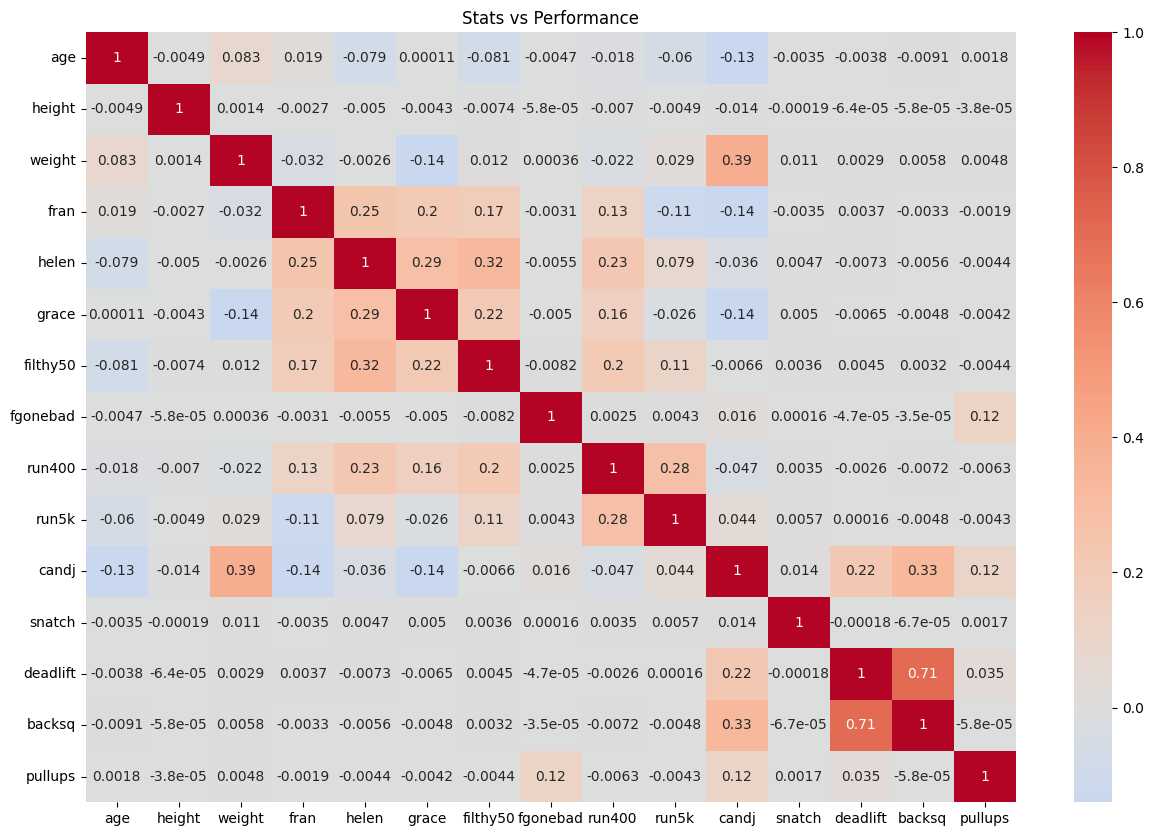

In [ ]:
stats_and_performance_features = df2

plt.subplots(figsize=(15, 10))
sns.heatmap(stats_and_performance_features.corr(), cmap='coolwarm', annot=True, center=0)

plt.title('Stats vs Performance')
plt.show()

In [ ]:

df2["eat"] = df2["eat"].astype(str)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20525 entries, 4 to 422754
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   region      15048 non-null  object 
 1   team        9913 non-null   object 
 2   affiliate   14544 non-null  object 
 3   gender      20525 non-null  object 
 4   age         20525 non-null  float64
 5   height      20525 non-null  float64
 6   weight      20525 non-null  float64
 7   fran        17218 non-null  float64
 8   helen       11679 non-null  float64
 9   grace       13448 non-null  float64
 10  filthy50    7834 non-null   float64
 11  fgonebad    10532 non-null  float64
 12  run400      12112 non-null  float64
 13  run5k       16397 non-null  float64
 14  candj       19458 non-null  float64
 15  snatch      19038 non-null  float64
 16  deadlift    20165 non-null  float64
 17  backsq      19855 non-null  float64
 18  pullups     14655 non-null  float64
 19  eat         20525 non-nu

<ipython-input-11-0b53ee705d52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["eat"] = df2["eat"].astype(str)


In [ ]:
# df2['eat'] = df2['eat'].str.lower()
# df2['eat'] = df2['eat'].str.replace('[^\w\s]', '')  # Remove punctuation
# df2['eat'] = df2['eat'].apply(word_tokenize)

# # Remove stopwords
# stop_words = set(stopwords.words('english'))
# df2['eat'] = df2['eat'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [ ]:
def preprocess_description(description):

    if "strict Paleo" in description:
        return "strictly paleo diet"
    elif "weight and measure" in description:
        return "healthy diet"
    elif "convenient" in description:
        return "no diet"
    elif "whatever" in description and "cheat meals" in description:
        return "unhealthy diet"
    elif "decline to answer" in description:
        return "decline to answer"
    elif "quality foods" in description:
        return "healthy diet"
    else:
        return "Other"

df2['eat']=df2['eat'].apply(preprocess_description)
df2['eat'].value_counts()


#it is giving output as other for all values??????????????


<ipython-input-195-8275bf58f0db>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['eat']=df2['eat'].apply(preprocess_description)


 healthy diet          6134
no diet                1852
Other                  1144
strictly paleo diet     772
Name: eat, dtype: int64

In [ ]:


def train(x):
    if pd.isna(x):
        return "Uncategorized"
    elif 'I workout mostly at a CrossFit Affiliate' and 'I incorporate CrossFit.com workouts' in x:
        return 'CF center and CFWO'
    elif 'I workout mostly at a CrossFit Affiliate' and 'I have a coach who determines my programming' in x:
        return 'CF center and Non CFWO'
    elif 'I incorporate CrossFit.com workouts' and 'I workout mostly at home, work, or a traditional gym' in x:
        return 'Non CF center CFWO'
    elif 'I workout mostly at home, work, or a traditional gym' and 'I have a coach who determines my programming' in x:
        return 'Non CF center and Non CFWO'
    elif 'I workout mostly at home, work, or a traditional gym' in x:
        return 'Non CF center'
    elif 'I workout mostly at a CrossFit Affiliate' in x:
        return 'CF center'
    elif 'I incorporate CrossFit.com workouts' in x:
        return 'CFWO'
    else :
        return 'Non CF center and Non CFWO'

def background(x):
    if pd.isna(x):
        return "Uncategorized"
    elif x == 'I have no athletic background besides CrossFit|':
        return 'Only CF'
    elif 'I played professional sports' in x:
        return 'Professional sports'
    elif 'I regularly play recreational sports' in x:
        return 'Regular rec sports'
    elif x == 'Decline to answer|':
        return 'Decline to answer'
    else:
        return 'Educational institute sports'

def experience(x):
    if pd.isna(x):
        return "Uncategorized"
    elif x == 'I began CrossFit with a coach (e.g. at an affiliate)|':
        return 'With coach'
    elif x == 'I began CrossFit by trying it alone (without a coach)|':
        return 'Without coach'
    elif x == 'Decline to answer|':
        return 'Decline to answer'
    elif 'I train other people' in x:
        return 'Trainer'
    elif 'I have attended one or more specialty courses' in x:
        return 'Speciality courses'
    elif 'I have completed the CrossFit Level 1 certificate course' in x:
        return 'Level 1'
    else:
        return 'Other'

# creating function to divide schedule column into  groups

def schedule(x):
    if pd.isna(x):
        return "Uncategorized"
    elif 'I do multiple workouts in a day 3+ times a week' in x:
        return '3+ a week'
    elif 'I do multiple workouts in a day 2x a week' in x:
        return '2x a week'
    elif 'I usually only do 1 workout a day' in x:
        return '1x a day'
    elif x=='Decline to answer|':
        return 'Decline to answer'
    else:
        return 'Other'

# creating function to divide howlong column into  groups

def howlong(x):
    if pd.isna(x):
        return "Uncategorized"
    elif '4+ years' in x:
        return '4+ years'
    elif '2-4 years' in x:
        return '2-4 years'
    elif '1-2 years' in x:
        return '1-2 years'
    elif '6-12 months' in x:
        return '6-12 months'
    elif 'Less than 6 months' in x:
        return 'Less than 6 months'
    elif x=='Decline to answer|':
        return 'Decline to answer'
    else:
        return 'Other'

In [ ]:
df2['train']=df2['train'].apply(train) # applying function to train column and storing it in train column
df2['background']=df2['background'].apply(background) # applying function to background column and storing it in background column
df2['experience']=df2['experience'].apply(experience) # applying function to experience column and storing it in experience column
df2['schedule']=df2['schedule'].apply(schedule) # applying function to schedule column and storing it in schedule column
df2['howlong']=df2['howlong'].apply(howlong) # applying function to howlong column and storing it in howlong column
df2.head() # checking df2

<ipython-input-197-67d5730c38a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['train']=df2['train'].apply(train) # applying function to train column and storing it in train column
<ipython-input-197-67d5730c38a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['background']=df2['background'].apply(background) # applying function to background column and storing it in background column
<ipython-input-197-67d5730c38a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

,region,team,affiliate,gender,age,height,weight,fran,helen,grace,...,snatch,deadlift,backsq,pullups,eat,train,background,experience,schedule,howlong
21,Southern California,CrossFit Training Yard,CrossFit Training Yard,Male,30.0,71.0,200.0,243.0,NaN,164.0,...,175.0,385.0,315.0,35.0,no diet,CF center and CFWO,Regular rec sports,Other,Other,1-2 years
101,South East,First Coast CrossFit,First Coast CrossFit,Male,44.0,69.0,168.0,175.0,615.0,171.0,...,185.0,435.0,405.0,34.0,healthy diet,CF center,Educational institute sports,With coach,1x a day,4+ years
102,South Central,Woodward CrossFit,Woodward CrossFit,Male,24.0,68.0,180.0,126.0,449.0,86.0,...,240.0,475.0,405.0,80.0,healthy diet,CF center and Non CFWO,Educational institute sports,Trainer,3+ a week,2-4 years
107,South West,SinCity CrossFit,SinCity CrossFit,Male,31.0,74.0,207.0,167.0,481.0,152.0,...,NaN,485.0,385.0,50.0,healthy diet,CF center,Educational institute sports,Level 1,1x a day,4+ years
110,South West,CrossFit The Point,CrossFit The Point,Male,31.0,67.0,150.0,244.0,486.0,294.0,...,175.0,410.0,330.0,42.0,healthy diet,CF center and CFWO,Educational institute sports,Trainer,3+ a week,2-4 years


In [ ]:
def find_outliers(df2,col):
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    df2 = df2[(df2[col] > lower_limit)]
    return df2

#calling function for each column
df2 = find_outliers(df2,'height')
df2 = find_outliers(df2,'weight')
df2 = find_outliers(df2,'fran')
df2 = find_outliers(df2,'helen')
df2 = find_outliers(df2,'grace')
df2 = find_outliers(df2,'filthy50')
df2 = find_outliers(df2,'run400')
df2 = find_outliers(df2,'run5k')
df2 = find_outliers(df2,'candj')
df2 = find_outliers(df2,'snatch')
df2 = find_outliers(df2,'deadlift')
df2 = find_outliers(df2,'backsq')
df2 = find_outliers(df2,'pullups')
df2.shape

In [ ]:

mean_fran=df['fran'].mean()
df2['fran'].fillna(mean_fran,inplace=True)

mean_helen=df['helen'].mean()
df2['helen'].fillna(mean_helen,inplace=True)

mean_grace=df['grace'].mean()
df2['grace'].fillna(mean_grace,inplace=True)

mean_filthy50=df['filthy50'].mean()
df2['filthy50'].fillna(mean_filthy50,inplace=True)

mean_fgonebad=df['fgonebad'].mean()
df2['fgonebad'].fillna(mean_fgonebad,inplace=True)

mean_run400=df['run400'].mean()
df2['run400'].fillna(mean_run400,inplace=True)

mean_run5k=df['run5k'].mean()
df2['run5k'].fillna(mean_run5k,inplace=True)

mean_candj=df['candj'].mean()
df2['candj'].fillna(mean_candj,inplace=True)

mean_snatch=df['snatch'].mean()
df2['snatch'].fillna(mean_snatch,inplace=True)

mean_deadlift=df['deadlift'].mean()
df2['deadlift'].fillna(mean_deadlift,inplace=True)

mean_backsq=df['backsq'].mean()
df2['backsq'].fillna(mean_backsq,inplace=True)

mean_backsq=df['backsq'].mean()
df2['backsq'].fillna(mean_backsq,inplace=True)

mean_pullups=df['pullups'].mean()
df2 ['pullups'].fillna(mean_pullups,inplace=True)



<ipython-input-199-e14ec9752d13>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(stats_and_performance_features.corr(), cmap='coolwarm', annot=True, center=0)


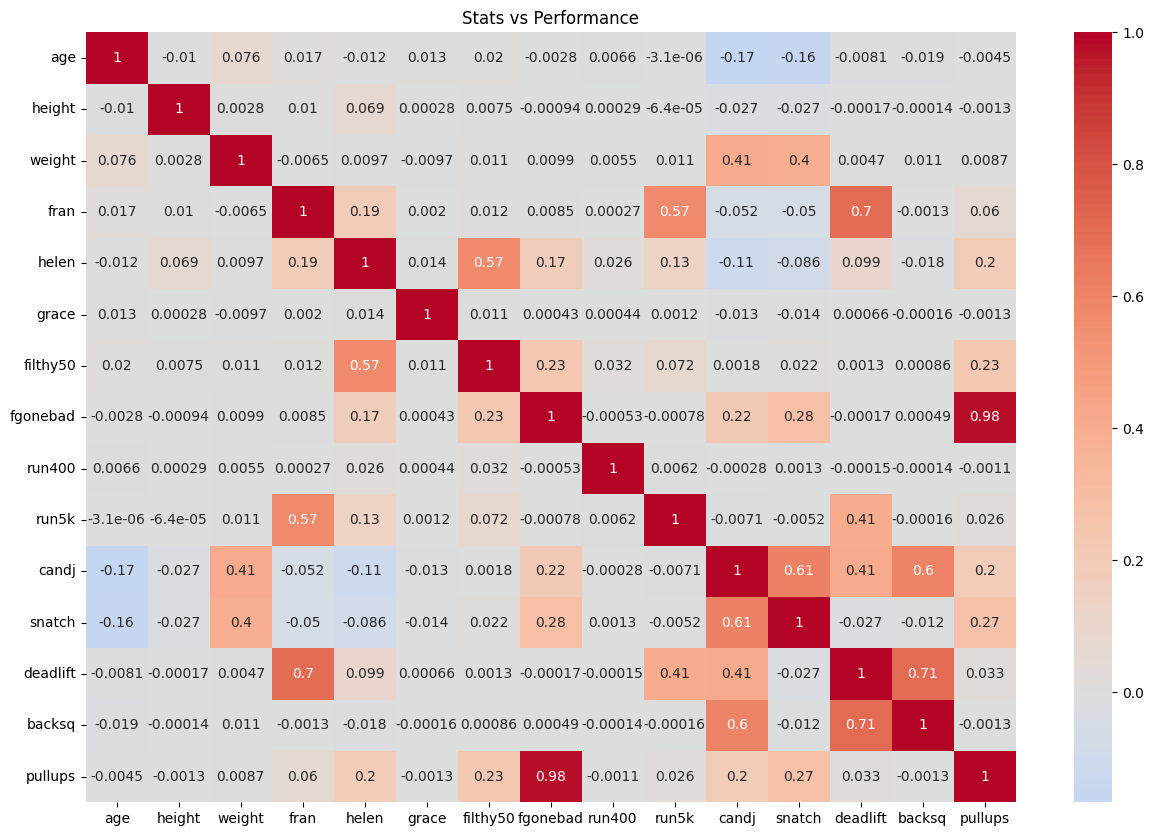

In [ ]:
stats_and_performance_features = df2

plt.subplots(figsize=(15, 10))
sns.heatmap(stats_and_performance_features.corr(), cmap='coolwarm', annot=True, center=0)

plt.title('Stats vs Performance')
plt.show()

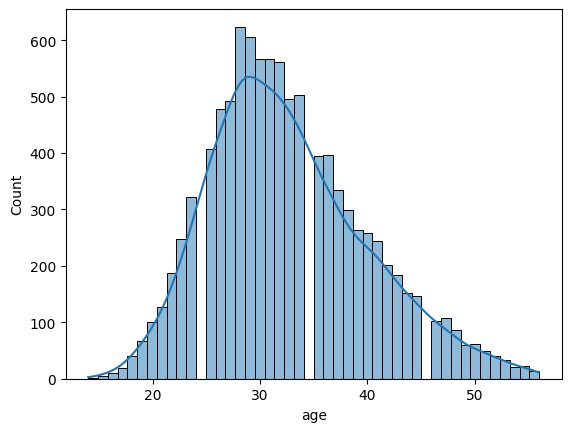

KeyboardInterrupt: ignored

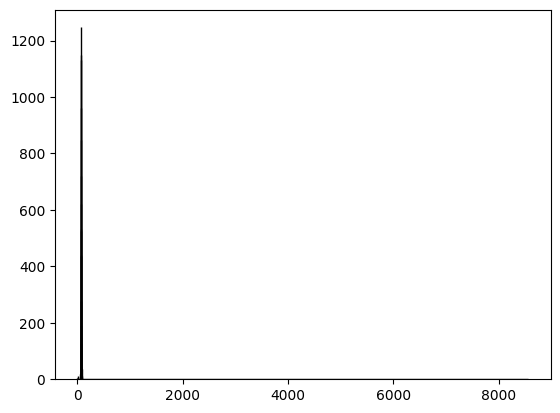

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Assuming df is your DataFrame and 'column_name' is the column to check
sns.histplot(df2['age'], kde=True)
plt.show()

sns.histplot(df2['height'], kde=True)
plt.show()

sns.histplot(df2['weight'], kde=True)
plt.show()


In [ ]:
df2.describe()

,age,height,weight,fran,helen,grace,filthy50,fgonebad,run400,run5k,candj,snatch,deadlift,backsq,pullups
count,9902.000000,9.902000e+03,9902.000000,9902.000000,9902.000000,9.902000e+03,9902.000000,9902.000000,9.902000e+03,9.902000e+03,9902.000000,9902.000000,9.902000e+03,9.902000e+03,9.902000e+03
mean,32.646435,9.163216e+02,178.512624,439.528703,851.682339,1.231528e+03,1921.253916,950.515714,1.148508e+03,4.538449e+03,218.695241,171.033138,2.077811e+03,1.161817e+03,1.290976e+04
std,7.337391,8.429946e+04,30.624180,3028.505032,402.576955,8.443923e+04,2244.011735,10107.255159,8.434243e+04,1.464107e+05,79.664242,62.065304,1.192070e+05,8.429707e+04,1.020216e+05
min,14.000000,0.000000e+00,60.000000,2.000000,60.000000,3.000000e+00,20.000000,0.000000,4.000000e+00,1.000000e+00,-45.000000,0.000000,0.000000e+00,0.000000e+00,-5.000000e+00
25%,27.000000,6.700000e+01,158.000000,210.000000,551.250000,1.570000e+02,1609.000000,305.000000,6.700000e+01,1.262000e+03,175.000000,135.000000,3.150000e+02,2.500000e+02,2.500000e+01
50%,32.000000,7.000000e+01,180.000000,297.000000,714.000000,2.350000e+02,2127.862596,412.000000,8.900000e+01,1.435000e+03,225.000000,168.000000,3.950000e+02,3.150000e+02,4.000000e+01
75%,37.000000,7.200000e+01,198.000000,461.000000,1207.950230,5.766025e+02,2127.862596,1472.252001,5.241279e+02,1.802750e+03,265.000000,205.000000,4.500000e+02,3.700000e+02,4.269613e+04
max,56.000000,8.388607e+06,340.000000,300000.000000,20827.000000,8.388607e+06,215400.000000,1000000.000000,8.388607e+06,8.388607e+06,5000.000000,2225.000000,8.388607e+06,8.388607e+06,9.972638e+06


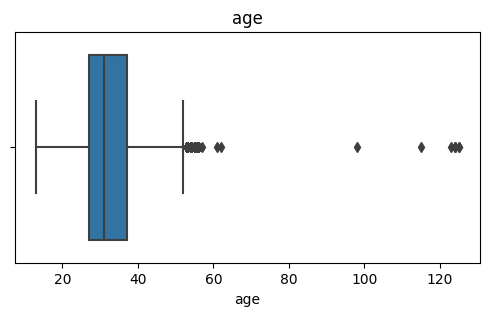

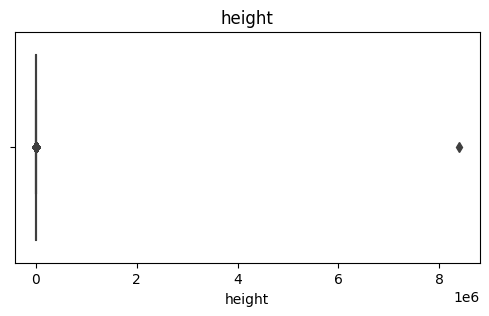

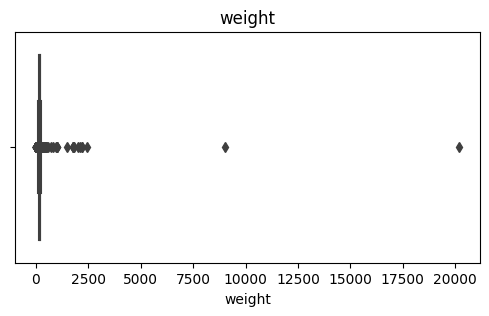

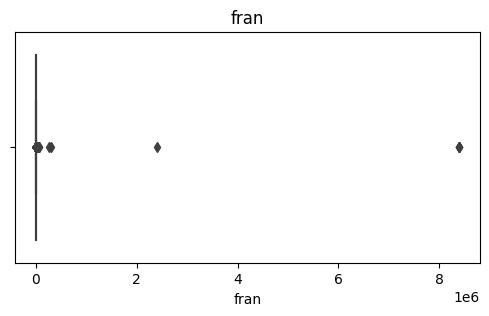

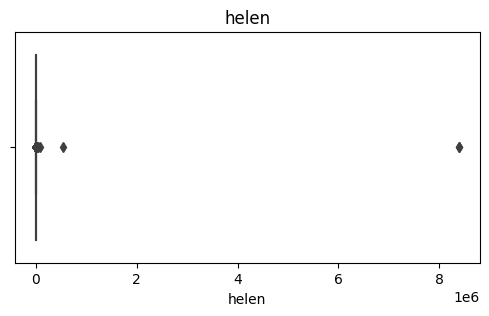

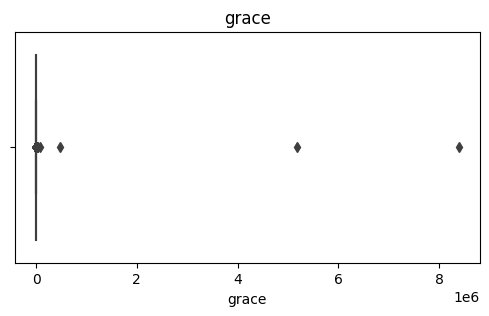

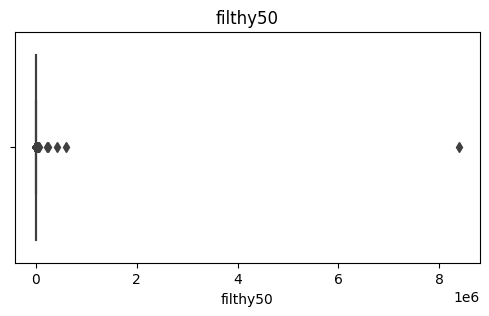

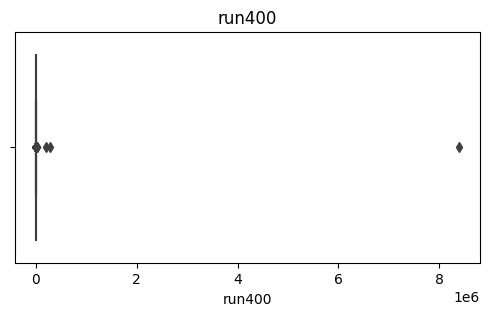

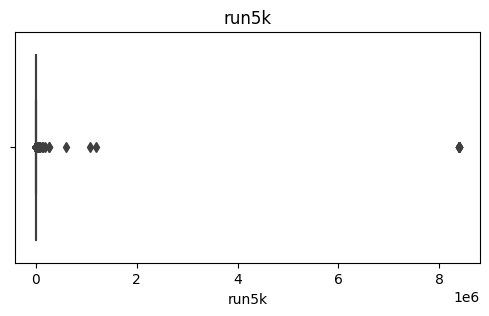

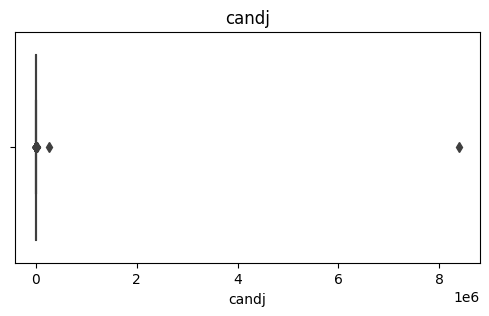

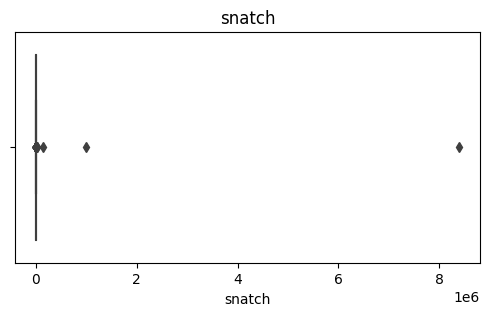

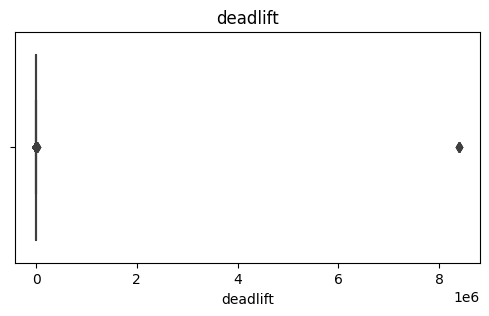

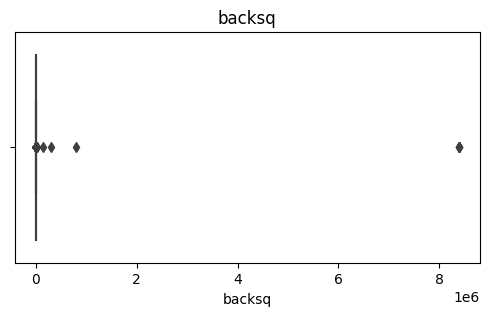

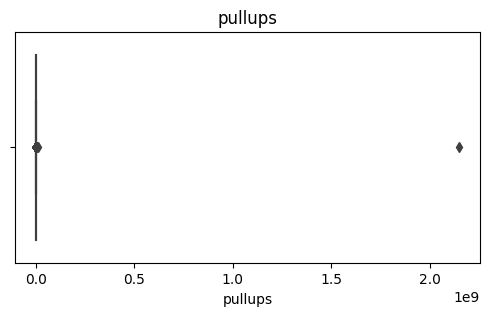

In [ ]:
boxplot = df2[['age','height', 'weight', 'fran', 'helen', 'grace', 'filthy50', 'run400', 'run5k', 'candj', 'snatch', 'deadlift', 'backsq', 'pullups']]
#cretating loop top plot box plots
for i in boxplot.columns:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

In [ ]:
df2.to_csv('output_file.csv', index=False)


In [ ]:
def find_outliers(df2,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    df2 = df2[(df2[col] < upper_limit) & (df2[col] > lower_limit)]
    return df2

#calling function for each column
df2 = find_outliers(df2,'height')
df2 = find_outliers(df2,'weight')
df2 = find_outliers(df2,'fran')
df2 = find_outliers(df2,'helen')
df2 = find_outliers(df2,'grace')
df2 = find_outliers(df2,'filthy50')
df2 = find_outliers(df2,'run400')
df2 = find_outliers(df2,'run5k')
df2 = find_outliers(df2,'candj')
df2 = find_outliers(df2,'snatch')
df2 = find_outliers(df2,'deadlift')
df2 = find_outliers(df2,'backsq')
df2 = find_outliers(df2,'pullups')
df2.shape

(1800, 25)

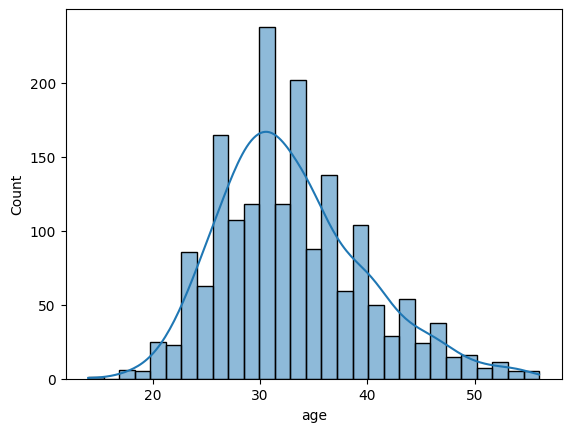

In [ ]:
sns.histplot(df2['age'], kde=True)
plt.show()

<Figure size 1000x500 with 0 Axes>

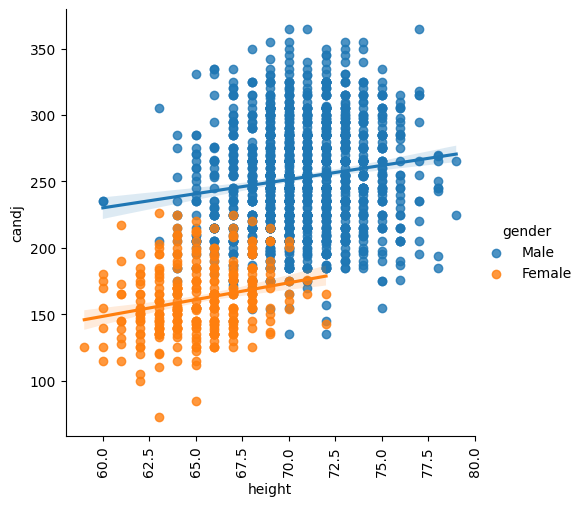

<Figure size 1000x500 with 0 Axes>

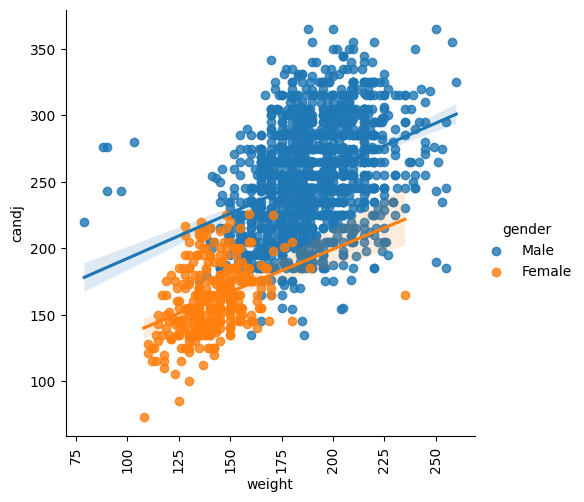

In [ ]:
plt.figure(figsize=(10,5))
sns.lmplot(x='height',y='candj',hue='gender',data=df2)
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,5))
sns.lmplot(x='weight',y='candj',hue='gender',data=df2)
plt.xticks(rotation=90)
plt.show()

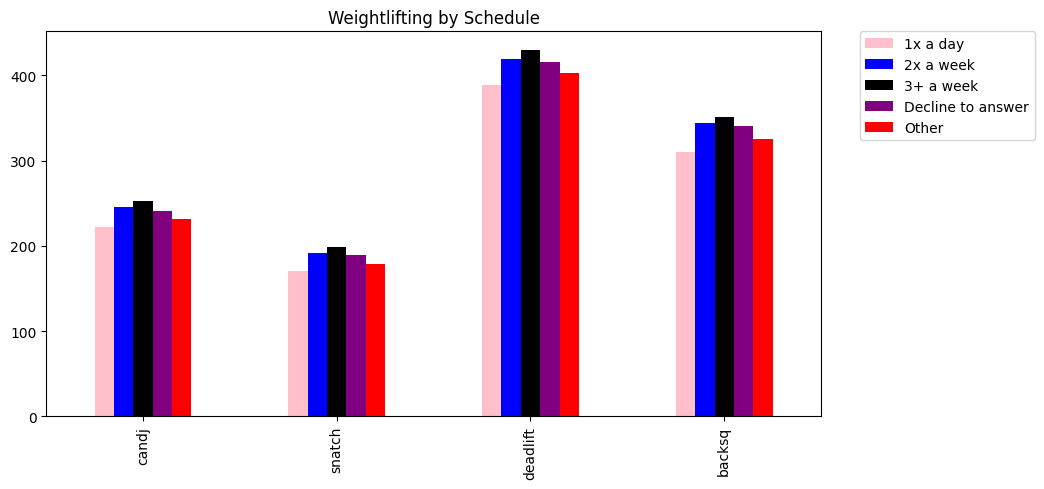

In [ ]:
wwo = df2.groupby(['schedule'])[["candj","snatch","deadlift","backsq"]].mean()
wwo.T

colors = ['pink','blue','black','purple','red']
wwo.T.plot(kind='bar', figsize=(10,5),color=colors)
plt.title('Weightlifting by Schedule')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

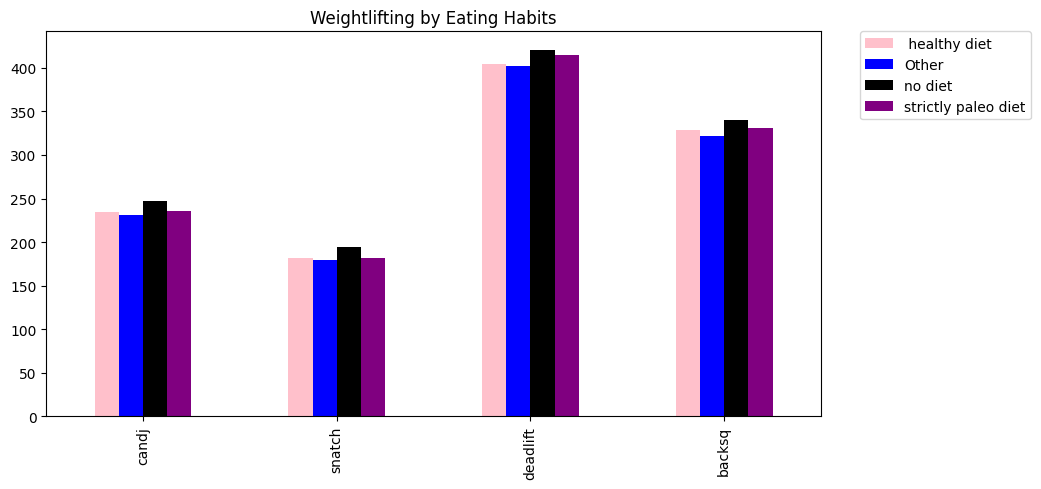

In [ ]:
wew = df2.groupby(['eat'])[["candj","snatch","deadlift","backsq"]].mean()
wew.T
colors = ['pink','blue','black','purple','red']
wew.T.plot(kind='bar', figsize=(10,5),color=colors)
plt.title('Weightlifting by Eating Habits')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)